##  Using Crossref API for citation metrics and publication details.

### Previously (Notebook 'C1'), we used Digital Object Identifiers (DOIs) to find citation metrics references reported by the BRC team in phase 2

### Now we want to add citation counts from CrossRef to compare


In [33]:
import pandas as pd
from habanero import Crossref, cn, counts, exceptions
import time


In [34]:
%matplotlib inline

In [35]:
df_in = pd.read_csv('./B1out_2366_with_Dimesions_Counts(15Oct19).csv')
df_in.columns


Index(['FinalDOI', 'ID', 'complete', 'api_add', 'times_cited',
       'recent_citations', 'highly_cited_1', 'highly_cited_5',
       'highly_cited_10', 'relative_citation_ratio', 'field_citation_ratio',
       'license'],
      dtype='object')

In [36]:
df_in[df_in.duplicated(subset='ID', keep=False)]

,FinalDOI,ID,complete,api_add,times_cited,recent_citations,highly_cited_1,highly_cited_5,highly_cited_10,relative_citation_ratio,field_citation_ratio,license


In [37]:
# rename the 'times_cited' column to 'Dim_times_cited', to differentiate from the CrossRef citations number

df_in.columns=(['FinalDOI', 'ID', 'complete', 'api_add', 'Dim_times_cited',
       'recent_citations', 'highly_cited_1', 'highly_cited_5',
       'highly_cited_10', 'relative_citation_ratio', 'field_citation_ratio',
       'license'])


In [38]:
cr = Crossref()

In [39]:
#Crossref(api_key = "168421")
# set a mailto address
Crossref(mailto = "laurence.brown@it.ox.ac.uk")

< Crossref 
URL: https://api.crossref.org
KEY: None
MAILTO: laurence.brown@it.ox.ac.uk
>

In [40]:
df_mini = df_in.iloc[560:570]

In [41]:
df_mini.head(2)

,FinalDOI,ID,complete,api_add,Dim_times_cited,recent_citations,highly_cited_1,highly_cited_5,highly_cited_10,relative_citation_ratio,field_citation_ratio,license
560,10.1007/s11882-014-0434-8,974,"eibel h, kraus h, sic h, kienzler ak, rizzi m....","{'doi': '10.1007/s11882-014-0434-8', 'times_ci...",14.0,6.0,False,False,False,0.50,2.00,This data has been sourced via the Dimensions ...
561,10.1016/j.neuroimage.2016.12.072,2376,"eippert f, kong y, winkler am, andersson jl, f...","{'doi': '10.1016/j.neuroimage.2016.12.072', 't...",23.0,19.0,False,False,False,4.18,11.59,This data has been sourced via the Dimensions ...


### And the works module (as used to get the most likely DOI from the title in earlier notebooks), can also be used to obtain specific details of the reference from the DOI, such as year and month of publication, as well as  citation count.    (... and potentially authors, try later) 

In [42]:
# an example of the full record found by DOI

cr.works(ids=df_in.FinalDOI[0])

{'status': 'ok',
 'message-type': 'work',
 'message-version': '1.0.0',
 'message': {'indexed': {'date-parts': [[2019, 8, 29]],
   'date-time': '2019-08-29T10:03:38Z',
   'timestamp': 1567073018374},
  'reference-count': 27,
  'publisher': 'Springer Nature',
  'issue': '1',
  'license': [{'URL': 'http://creativecommons.org/licenses/by/4.0',
    'start': {'date-parts': [[2014, 8, 31]],
     'date-time': '2014-08-31T00:00:00Z',
     'timestamp': 1409443200000},
    'delay-in-days': 0,
    'content-version': 'unspecified'}],
  'content-domain': {'domain': ['link.springer.com'],
   'crossmark-restriction': False},
  'short-container-title': ['BMC Med Genet'],
  'published-print': {'date-parts': [[2014, 12]]},
  'DOI': '10.1186/s12881-014-0095-4',
  'type': 'journal-article',
  'created': {'date-parts': [[2014, 8, 30]],
   'date-time': '2014-08-30T14:03:56Z',
   'timestamp': 1409407436000},
  'update-policy': 'http://dx.doi.org/10.1007/springer_crossmark_policy',
  'source': 'Crossref',
  'i

In [43]:
cr.works(ids=df_in.FinalDOI[0])['message']['is-referenced-by-count']

4

In [44]:
pd.Timestamp(cr.works(ids=df_in.FinalDOI[0])['message']['created']['date-time'])  # also try ['message']['issued']

Timestamp('2014-08-30 14:03:56+0000', tz='UTC')

In [45]:
cr.works(ids=df_in.FinalDOI[0])['message']['author']

[{'given': 'Aimee L',
  'family': 'Fenwick',
  'sequence': 'first',
  'affiliation': []},
 {'given': 'Jacqueline AC',
  'family': 'Goos',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Julia',
  'family': 'Rankin',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Helen',
  'family': 'Lord',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Tracy',
  'family': 'Lester',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'A Jeannette M',
  'family': 'Hoogeboom',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Ans MW',
  'family': 'van den Ouweland',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Steven A',
  'family': 'Wall',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Irene MJ',
  'family': 'Mathijssen',
  'sequence': 'additional',
  'affiliation': []},
 {'given': 'Andrew OM',
  'family': 'Wilkie',
  'sequence': 'additional',
  'affiliation': []}]

In [46]:
def CrossRefTimeCitesAuthors(df):
    try:
        search = cr.works(ids=df.FinalDOI)
        time.sleep(0.1)
        try:
            pub_time = pd.Timestamp(search ['message']['created']['date-time'])
        except:
            pub_time = pd.np.nan
        try:
            citations = search ['message']['is-referenced-by-count']
        except:
            citations = pd.np.nan
        try:
            authors = search ['message']['author'] 
        except:
            authors = pd.np.nan
        return pub_time, citations, authors
    except:
        return pd.np.nan, pd.np.nan, pd.np.nan
        time.sleep(0.1)
        pass






In [47]:
df_mini[['pub_date_CR_API','CR_times_cited','authors_CR']]= df_mini.apply(CrossRefTimeCitesAuthors,
                                                                          axis=1, result_type='expand')

df_mini

C:\Users\loz_r\Miniconda3\envs\biblio_edge\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,FinalDOI,ID,complete,api_add,Dim_times_cited,recent_citations,highly_cited_1,highly_cited_5,highly_cited_10,relative_citation_ratio,field_citation_ratio,license,pub_date_CR_API,CR_times_cited,authors_CR
560,10.1007/s11882-014-0434-8,974,"eibel h, kraus h, sic h, kienzler ak, rizzi m....","{'doi': '10.1007/s11882-014-0434-8', 'times_ci...",14.0,6.0,False,False,False,0.50,2.00,This data has been sourced via the Dimensions ...,2014-03-18 04:19:46+00:00,12,"[{'given': 'Hermann', 'family': 'Eibel', 'sequ..."
561,10.1016/j.neuroimage.2016.12.072,2376,"eippert f, kong y, winkler am, andersson jl, f...","{'doi': '10.1016/j.neuroimage.2016.12.072', 't...",23.0,19.0,False,False,False,4.18,11.59,This data has been sourced via the Dimensions ...,2016-12-24 18:33:57+00:00,22,"[{'given': 'Falk', 'family': 'Eippert', 'seque..."
562,10.1111/imm.12226,938,"elias sc, choudhary p, de cassan sc, biswas s,...","{'doi': '10.1111/imm.12226', 'times_cited': 25...",25.0,3.0,False,False,False,1.64,4.32,This data has been sourced via the Dimensions ...,2013-12-05 10:23:11+00:00,26,"[{'given': 'Sean C.', 'family': 'Elias', 'sequ..."
563,10.4049/jimmunol.1201455,323,"elias sc, collins ka, halstead fd, choudhary p...","{'doi': '10.4049/jimmunol.1201455', 'times_cit...",13.0,3.0,False,False,False,0.58,1.88,This data has been sourced via the Dimensions ...,2013-01-05 07:24:25+00:00,16,"[{'given': 'Sean C.', 'family': 'Elias', 'sequ..."
564,10.1016/j.jcmg.2012.02.016,136,"elkhawad m, rudd jhf, sarov-blat l, cai g, wil...","{'doi': '10.1016/j.jcmg.2012.02.016', 'times_c...",85.0,16.0,False,False,False,3.22,22.13,This data has been sourced via the Dimensions ...,2012-09-10 22:00:32+00:00,73,"[{'given': 'Maysoon', 'family': 'Elkhawad', 's..."
565,10.1097/inf.0000000000001011,1702,"ellul ma, griffiths mj, iyer a, avula s, defre...","{'doi': '10.1097/inf.0000000000001011', 'times...",6.0,1.0,False,False,False,1.00,1.70,This data has been sourced via the Dimensions ...,2015-12-09 19:18:39+00:00,5,"[{'given': 'Mark A.', 'family': 'Ellul', 'sequ..."
566,10.1111/jicd.12088,445,"elshibly a, coulter w, millar b, prendergast b...","{'doi': '10.1111/jicd.12088', 'times_cited': 6...",6.0,5.0,False,False,False,0.37,1.51,This data has been sourced via the Dimensions ...,2014-03-07 11:50:21+00:00,3,"[{'given': 'Ahmed', 'family': 'Elshibly', 'seq..."
567,10.1001/jamainternmed.2014.6924,1339,"emdin c, odutayo a, hsiao a, shakir m, hopewel...","{'doi': '10.1001/jamainternmed.2014.6924', 'ti...",18.0,7.0,False,False,False,0.91,NaN,This data has been sourced via the Dimensions ...,2014-12-29 23:31:12+00:00,16,"[{'given': 'Connor', 'family': 'Emdin', 'seque..."
568,10.1136/bmj.h4865,1610,"emdin ca, anderson sg, callender t, conrad n, ...","{'doi': '10.1136/bmj.h4865', 'times_cited': 40...",40.0,29.0,False,False,False,2.13,13.19,This data has been sourced via the Dimensions ...,2015-09-30 18:16:00+00:00,34,"[{'given': 'Connor A', 'family': 'Emdin', 'seq..."
569,10.1093/ije/dyw053,2065,"emdin ca, anderson sg, salimi-khorshidi g, woo...","{'doi': '10.1093/ije/dyw053', 'times_cited': 2...",21.0,10.0,False,False,False,3.30,9.54,This data has been sourced via the Dimensions ...,2016-05-04 01:31:33+00:00,5,"[{'given': 'Connor A.', 'family': 'Emdin', 'se..."


In [48]:
df_in[['pub_date_CR_API','CR_times_cited','authors_CR']]= df_in.apply(CrossRefTimeCitesAuthors,
                                                                          axis=1, result_type='expand')

In [49]:
df_in.count()

FinalDOI                   2366
ID                         2366
complete                   2366
api_add                    2364
Dim_times_cited            2346
recent_citations           2346
highly_cited_1             2346
highly_cited_5             2346
highly_cited_10            2346
relative_citation_ratio    2277
field_citation_ratio       2229
license                    2346
pub_date_CR_API            2361
CR_times_cited             2361
authors_CR                 2346
dtype: int64

In [50]:
df_in['year'] = df_in.pub_date_CR_API.dt.year
df_in['month'] = df_in.pub_date_CR_API.dt.month

In [51]:
df_in.to_csv('./C1in_2366_DOIsWith_2counts_and_year(15Oct19).csv')

In [55]:
df_in.head()

,FinalDOI,ID,complete,api_add,Dim_times_cited,recent_citations,highly_cited_1,highly_cited_5,highly_cited_10,relative_citation_ratio,field_citation_ratio,license,pub_date_CR_API,CR_times_cited,authors_CR,year,month
0,10.1186/s12881-014-0095-4,1125,"&amp; , fenwick al, goos jac, rankin j, lord h...","{'doi': '10.1186/s12881-014-0095-4', 'times_ci...",5.0,3.0,False,False,False,0.25,0.65,This data has been sourced via the Dimensions ...,2014-08-30 14:03:56+00:00,4.0,"[{'given': 'Aimee L', 'family': 'Fenwick', 'se...",2014.0,8.0
1,10.1183/13993003.00321-2016,1996,", pattinson kt, turner mr. a wider pathologica...","{'doi': '10.1183/13993003.00321-2016', 'times_...",2.0,1.0,False,False,False,0.26,0.68,This data has been sourced via the Dimensions ...,2016-06-01 01:53:39+00:00,1.0,"[{'given': 'Kyle T.S.', 'family': 'Pattinson',...",2016.0,6.0
2,10.1161/strokeaha.113.679936,506,"adib-samii p, rost n, traylor m, devan w, ...","{'doi': '10.1161/strokeaha.113.679936', 'times...",33.0,5.0,False,False,False,1.49,8.29,This data has been sourced via the Dimensions ...,2013-05-15 04:36:29+00:00,31.0,"[{'given': 'Poneh', 'family': 'Adib-Samii', 's...",2013.0,5.0
3,10.1093/annonc/mdu449,1430,"and i. tomlinson*, findlay jm, middleton mr, t...","{'doi': '10.1093/annonc/mdu449', 'times_cited'...",37.0,14.0,False,False,False,2.57,9.00,This data has been sourced via the Dimensions ...,2014-09-12 00:32:37+00:00,26.0,"[{'given': 'J. M.', 'family': 'Findlay', 'sequ...",2014.0,9.0
4,10.1161/strokeaha.113.002707,848,"dichgans m, malik r, kã•_nig ir, rosand j, ...","{'doi': '10.1161/strokeaha.113.002707', 'times...",185.0,60.0,False,False,False,8.59,50.96,This data has been sourced via the Dimensions ...,2013-11-22 05:07:47+00:00,173.0,"[{'given': 'Martin', 'family': 'Dichgans', 'se...",2013.0,11.0


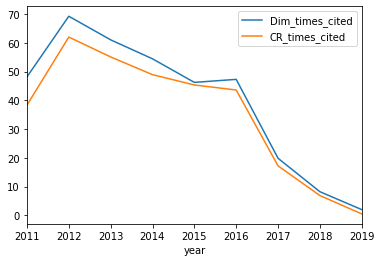

In [53]:
df_in.groupby(['year'])['Dim_times_cited','CR_times_cited'].mean().plot()

In [54]:

df_noCR=df_in[df_in.CR_times_cited.isna()]
df_noCR.shape

(5, 17)